In [13]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.core import datetools
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

In [14]:
#Importing and indexing data set
rawdata = pd.read_csv('GDP.csv')
rawdata['DATE'] = pd.to_datetime(rawdata['DATE'], infer_datetime_format=True)
dataset = rawdata.set_index(['DATE'])
dataset.tail(5)

,GDP
DATE,
2017-10-01,19831.829
2018-01-01,20041.047
2018-04-01,20411.924
2018-07-01,20658.204
2018-10-01,20891.367


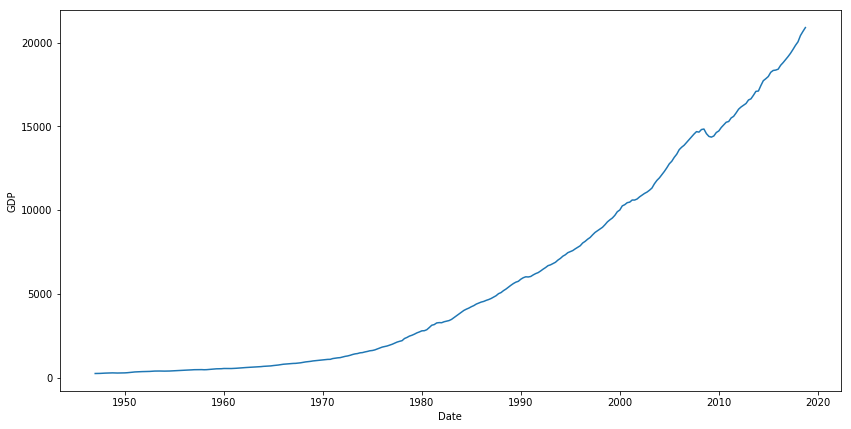

In [15]:
#Plotting intial data set
fig, ax = plt.subplots(figsize=(14,7))

ax.set_ylabel('GDP')
ax.set_xlabel('Date')
ax.plot(dataset)

In [16]:
#Rolling mean and standard deviation 
rm = dataset.rolling(window = 15, min_periods = 0).mean()
era = dataset.ewm(span=15, min_periods = 0).mean()
rstd = dataset.rolling(window=15, min_periods = 0).std()
print(rm.tail(15), era.tail(15), rstd.head(5))

                     GDP
DATE                    
2015-04-01  16933.506667
2015-07-01  17102.482200
2015-10-01  17258.123133
2016-01-01  17408.581333
2016-04-01  17567.486733
2016-07-01  17730.205733
2016-10-01  17890.849333
2017-01-01  18059.157600
2017-04-01  18226.515933
2017-07-01  18393.511733
2017-10-01  18575.438200
2018-01-01  18749.790267
2018-04-01  18929.262800
2018-07-01  19117.246133
2018-10-01  19311.975800                      GDP
DATE                    
2015-04-01  16651.579732
2015-07-01  16811.533377
2015-10-01  16958.470388
2016-01-01  17096.628447
2016-04-01  17243.685928
2016-07-01  17391.872792
2016-10-01  17543.051097
2017-01-01  17697.289088
2017-04-01  17855.558985
2017-07-01  18020.560415
2017-10-01  18193.062185
2018-01-01  18369.060738
2018-04-01  18563.619144
2018-07-01  18763.103416
2018-10-01  18965.795186                  GDP
DATE                
1947-01-01       NaN
1947-04-01  1.982727
1947-07-01  3.219067
1947-10-01  7.246466
1948-01-01  9.560139


Text(0.5, 1.0, 'Rolling Mean and STD')

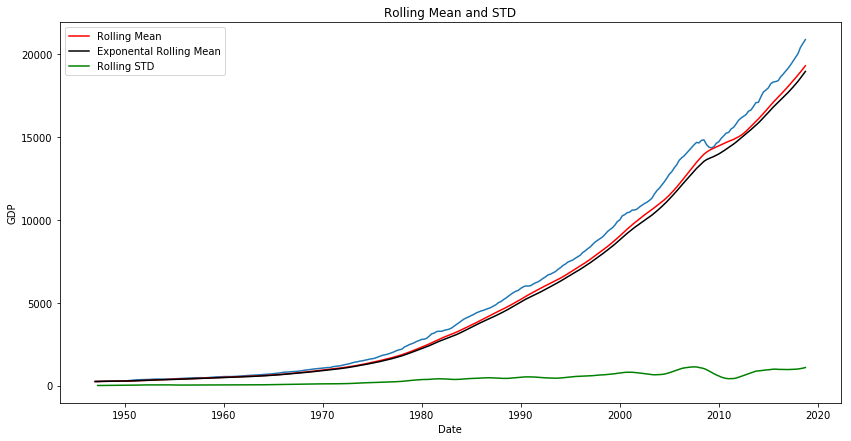

In [44]:
fig, ax = plt.subplots(figsize=(14,7))

ax.set_ylabel('GDP')
ax.set_xlabel('Date')
ax.plot(dataset)
ax.plot(rm, label = 'Rolling Mean', color = 'red')
ax.plot(era, label = 'Exponental Rolling Mean', color = 'black')
ax.plot(rstd, label = 'Rolling STD', color = 'green')
ax.legend(loc='best')
plt.title('Rolling Mean and STD')

In [45]:
# Dickey-fuller test
from statsmodels.tsa.stattools import adfuller

print('Results DF Test')
dftest = adfuller(dataset['GDP'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Stats', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results DF Test
Test Stats                       4.755211
p-value                          1.000000
#Lags Used                       3.000000
Number of Observations Used    284.000000
Critical Value (1%)             -3.453587
Critical Value (5%)             -2.871771
Critical Value (10%)            -2.572222
dtype: float64


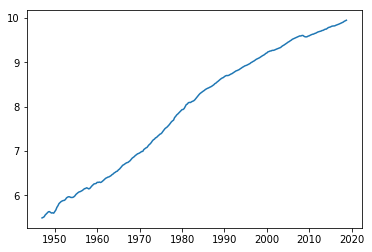

In [46]:
# Estimating Trend
dataset_logscale = np.log(dataset)
plt.plot(dataset_logscale)

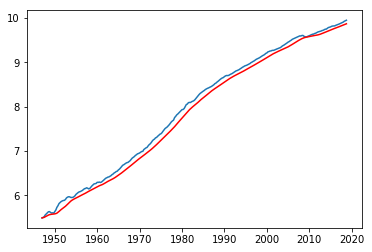

In [47]:
logrm = dataset_logscale.rolling(window = 15, min_periods = 0).mean()
logrSTD = dataset_logscale.rolling(window = 15, min_periods = 0).std()
plt.plot(dataset_logscale)
plt.plot(logrm, color = 'red')

In [48]:
logscaleMinusRollingAverage = dataset_logscale - rm

#remove NA valuses
logscaleMinusRollingAverage.dropna(inplace=True)
logscaleMinusRollingAverage.head(5)

,GDP
DATE,
1947-01-01,-237.670264
1947-04-01,-239.060799
1947-07-01,-240.719200
1947-10-01,-244.055800
1948-01-01,-247.258274


In [85]:
#Making 
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #rolling stats
    rm = timeseries.rolling(window=15, min_periods = 0).mean()
    rstd = timeseries.rolling(window=15, min_periods = 0).std()

    #plotting stats
    fig, ax = plt.subplots(figsize=(14,7))
    
    ax.set_ylabel('GDP')
    ax.set_xlabel('Date')
    ax.plot(timeseries)
    ax.plot(rm, label = 'Rolling Mean', color = 'red')
    ax.plot(rstd, label = 'Rolling STD', color = 'green')
    ax.legend(loc='best')
    plt.title('Log Rolling Mean and STD')
        
    #Dickey-Fuller test:
    print('Results DF Test')
    dftest = adfuller(dataset['GDP'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Stats', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value    
    print(dfoutput)
        

Results DF Test
Test Stats                       4.755211
p-value                          1.000000
#Lags Used                       3.000000
Number of Observations Used    284.000000
Critical Value (1%)             -3.453587
Critical Value (5%)             -2.871771
Critical Value (10%)            -2.572222
dtype: float64


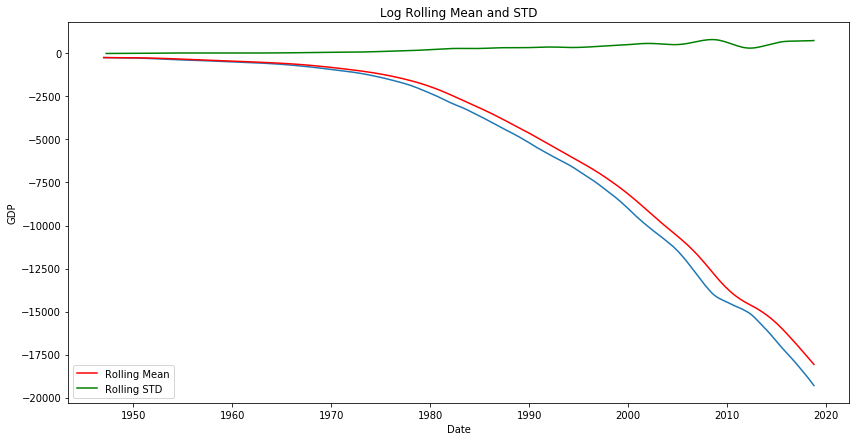

In [86]:
test_stationarity(logscaleMinusRollingAverage)

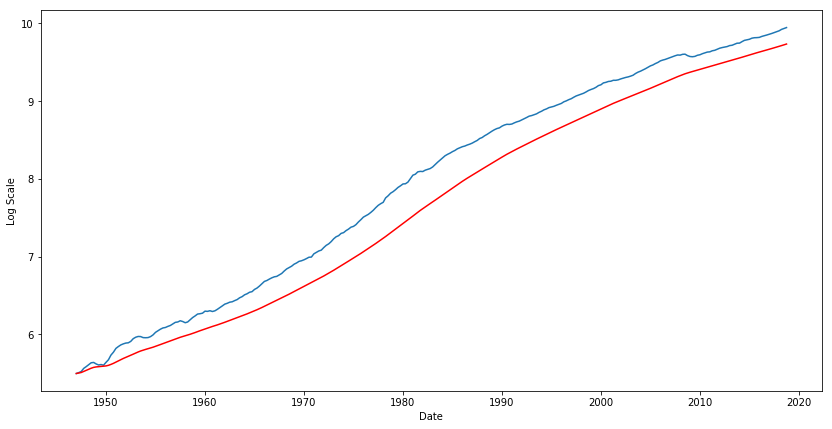

In [87]:
#Exponential Decay Weighted Average 
edwa = dataset_logscale.ewm(halflife = 15, min_periods = 0, adjust=True).mean()
fig, ax = plt.subplots(figsize=(14,7))

ax.set_ylabel('Log Scale')
ax.set_xlabel('Date')
ax.plot(dataset_logscale)
ax.plot(edwa, label = 'Exponential Decay Weighted Average', color = 'red')

Results DF Test
Test Stats                       4.755211
p-value                          1.000000
#Lags Used                       3.000000
Number of Observations Used    284.000000
Critical Value (1%)             -3.453587
Critical Value (5%)             -2.871771
Critical Value (10%)            -2.572222
dtype: float64


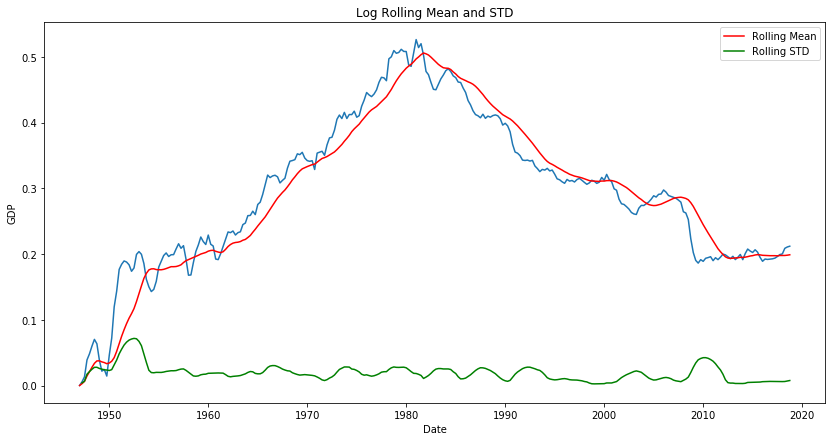

In [88]:
logscaleMinusExpentialDecay = dataset_logscale - edwa
test_stationarity(logscaleMinusExpentialDecay)

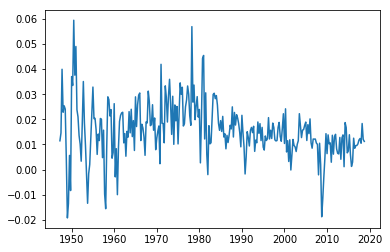

In [89]:
datasetLogDiffShifting = dataset_logscale - dataset_logscale.shift()
plt.plot(datasetLogDiffShifting)

Results DF Test
Test Stats                       4.755211
p-value                          1.000000
#Lags Used                       3.000000
Number of Observations Used    284.000000
Critical Value (1%)             -3.453587
Critical Value (5%)             -2.871771
Critical Value (10%)            -2.572222
dtype: float64


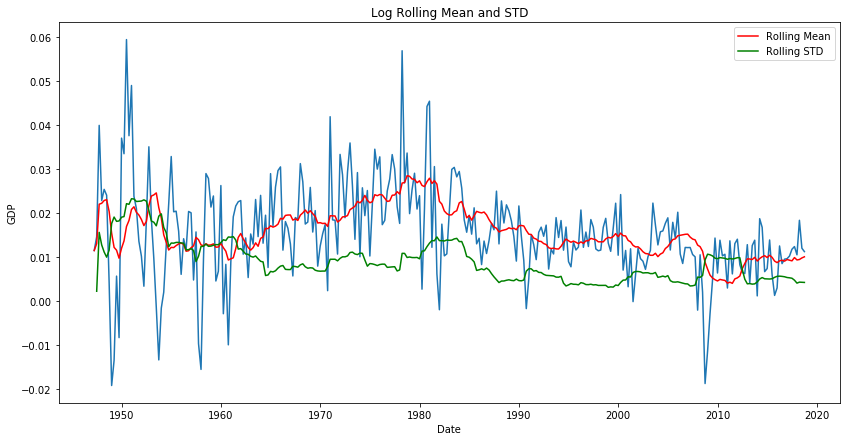

In [90]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

Results DF Test
Test Stats                       4.755211
p-value                          1.000000
#Lags Used                       3.000000
Number of Observations Used    284.000000
Critical Value (1%)             -3.453587
Critical Value (5%)             -2.871771
Critical Value (10%)            -2.572222
dtype: float64


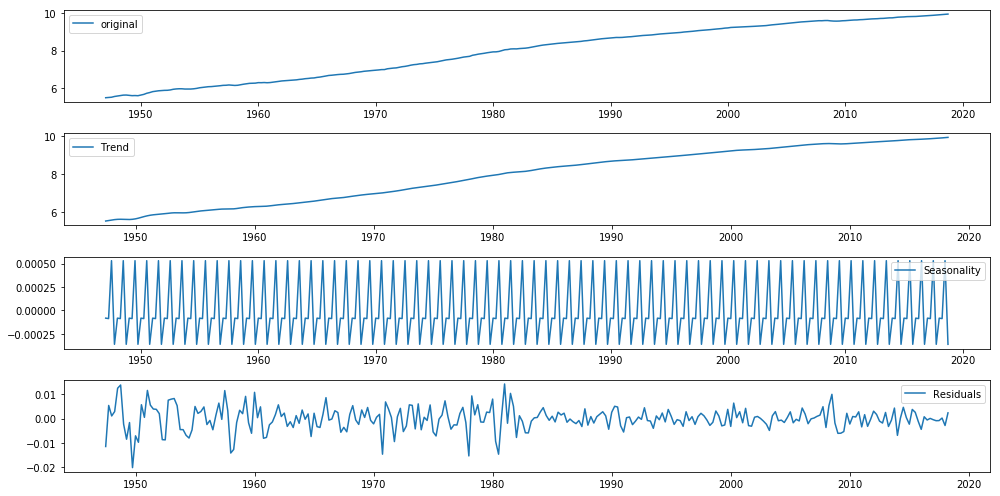

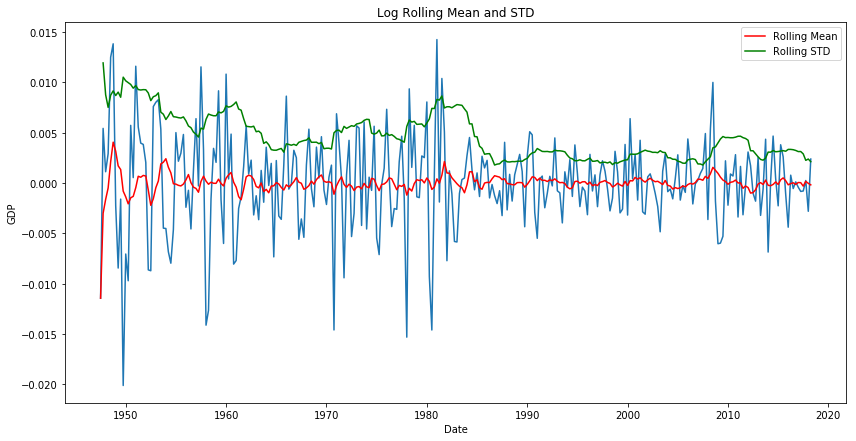

In [91]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(dataset_logscale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

f = plt.figure(figsize=(14,7))
plt.subplot(4,1,1)
plt.plot(dataset_logscale, label= 'original')
plt.legend(loc='best')
plt.subplot(4,1,2)
plt.plot(trend, label = 'Trend')
plt.legend(loc='best')
plt.subplot(4,1,3)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc='best')
plt.subplot(4,1,4)
plt.plot(residual, label = 'Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

Results DF Test
Test Stats                       4.755211
p-value                          1.000000
#Lags Used                       3.000000
Number of Observations Used    284.000000
Critical Value (1%)             -3.453587
Critical Value (5%)             -2.871771
Critical Value (10%)            -2.572222
dtype: float64


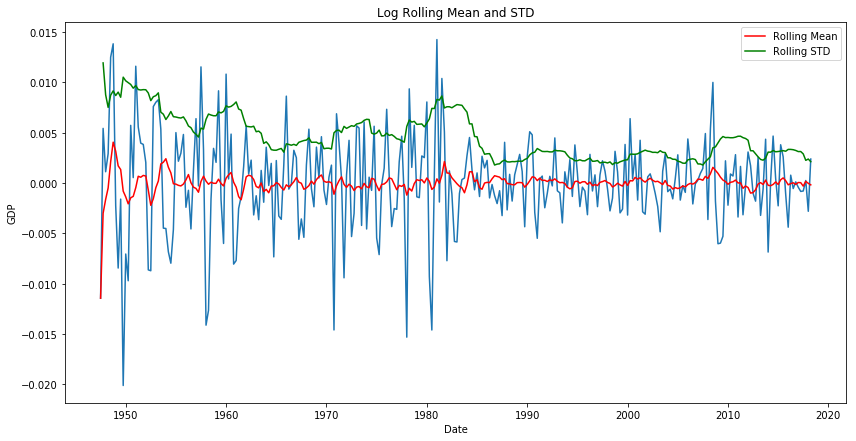

In [92]:
decomposedDataset_logscale = residual
decomposedDataset_logscale.dropna(inplace=True)
test_stationarity(decomposedDataset_logscale)

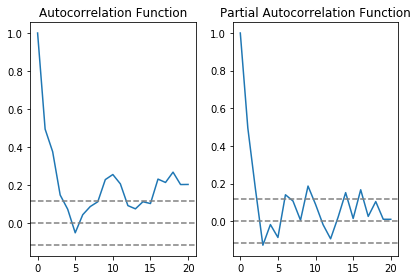

In [99]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method= 'ols')

#plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle= '--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle= '--', color = 'gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle= '--', color = 'gray')
plt.title('Autocorrelation Function')

#plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle= '--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle= '--', color = 'gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle= '--', color = 'gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

C:\Users\Class2018\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\Class2018\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


AR model


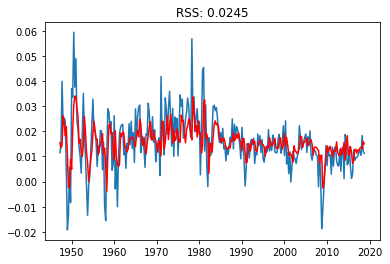

In [105]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(dataset_logscale, order=(2, 1, 2))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color = 'red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting['GDP'])**2))
print('AR model')

C:\Users\Class2018\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\Class2018\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


AR model


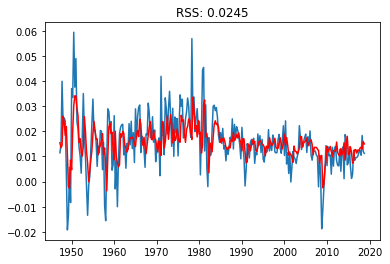

In [108]:
model = ARIMA(dataset_logscale, order=(2, 1, 1))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color = 'red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting['GDP'])**2))
print('AR model')

In [110]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy = True)
print(predictions_ARIMA_diff.head())

DATE
1947-04-01    0.015461
1947-07-01    0.013489
1947-10-01    0.014395
1948-01-01    0.026002
1948-04-01    0.023568
dtype: float64


In [111]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

DATE
1947-04-01    0.015461
1947-07-01    0.028950
1947-10-01    0.043344
1948-01-01    0.069347
1948-04-01    0.092915
dtype: float64


In [115]:
predictions_ARIMA_log = pd.Series(dataset_logscale['GDP'].iloc[0], index=dataset_logscale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

DATE
1947-01-01    5.493736
1947-04-01    5.509197
1947-07-01    5.522686
1947-10-01    5.537080
1948-01-01    5.563083
dtype: float64

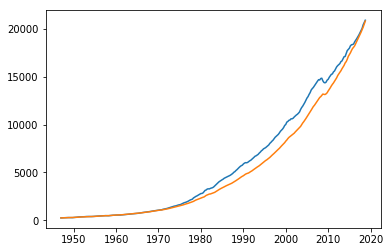

In [116]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(dataset)
plt.plot(predictions_ARIMA)

In [117]:
dataset

,GDP
DATE,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742
1948-04-01,272.567
1948-07-01,279.196
1948-10-01,280.366
1949-01-01,275.034


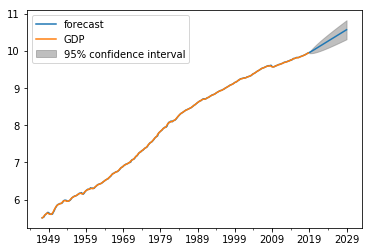

In [120]:
# Perdict for the next 10 years
results_AR.plot_predict(1, 328)
x=results_AR.forecast(steps=40)

In [121]:
x[1]

array([0.00924079, 0.01613172, 0.02329333, 0.02949923, 0.03537284,
       0.04059088, 0.04546874, 0.04991153, 0.05408371, 0.05796016,
       0.0616295 , 0.0650893 , 0.06838925, 0.07153402, 0.07455275,
       0.07745181, 0.08024916, 0.08295099, 0.08556893, 0.08810843,
       0.09057742, 0.0929805 , 0.09532334, 0.09760977, 0.09984402,
       0.10202924, 0.10416872, 0.10626508, 0.10832091, 0.11033842,
       0.11231972, 0.11426665, 0.11618098, 0.11806426, 0.11991797,
       0.12174346, 0.12354198, 0.12531468, 0.12706266, 0.12878692])

In [122]:
len(x[1])

40